In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import  matplotlib.pyplot as plt

plt.style.use('classic')




In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


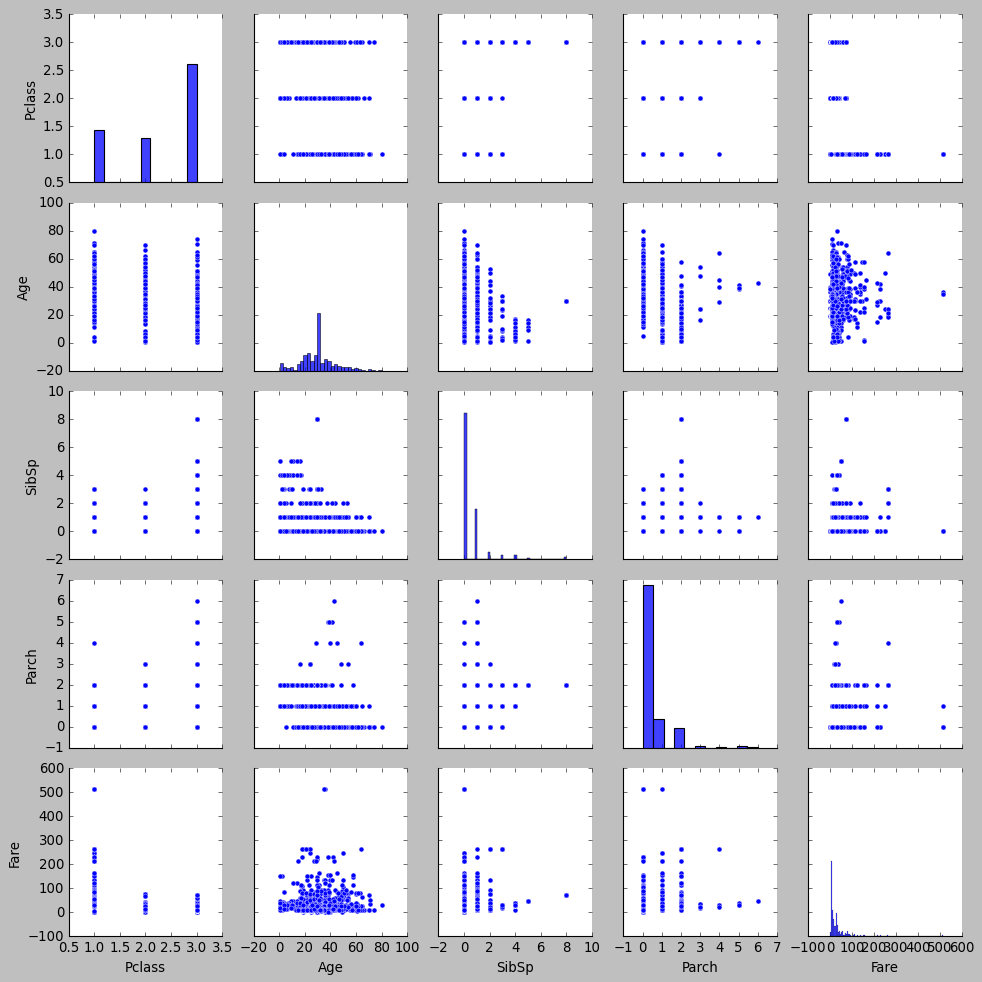

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric features
num_features = ["Pclass", "Age", "SibSp", "Parch", "Fare"]

# Create the pairplot
sns.pairplot(df[num_features], diag_kind="hist")  # use "kde" if you prefer density on diagonals
plt.show()


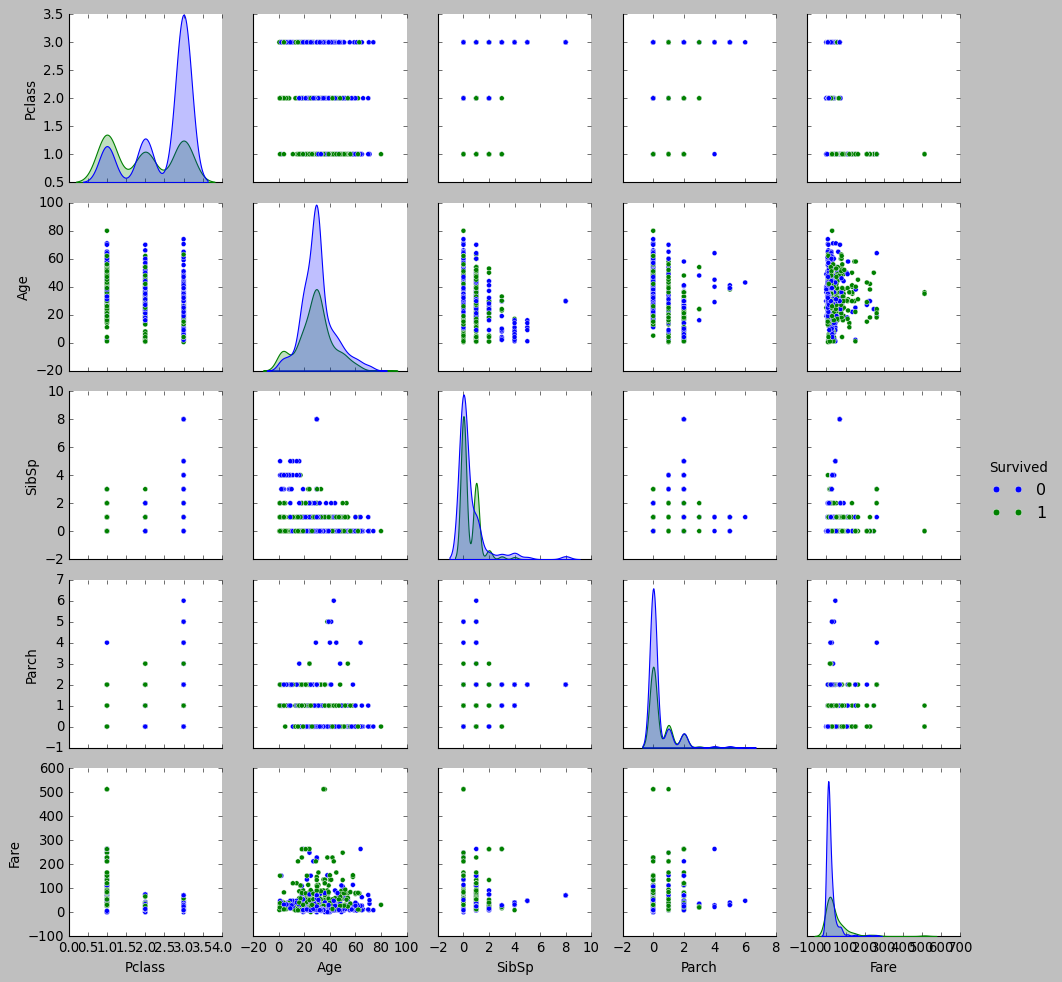

In [22]:
sns.pairplot(df, vars=num_features, hue="Survived", diag_kind="kde")
plt.show()


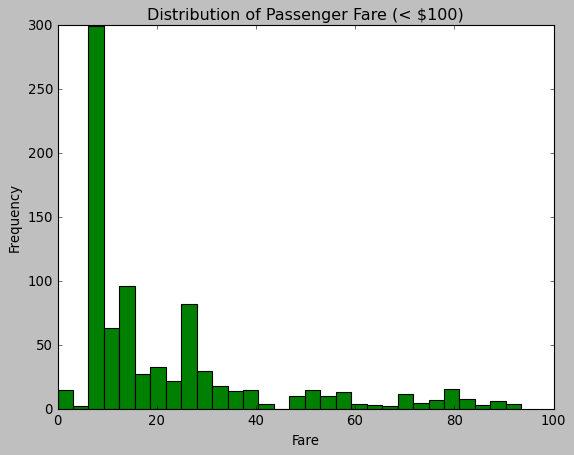

In [4]:
plt.figure(figsize=(8,6))
plt.hist(df[df['Fare'] < 100]['Fare'], bins=30, edgecolor='black', color='green')
plt.title("Distribution of Passenger Fare (< $100)")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()


In [5]:
# Fill NaN values in 'Embarked' column with 'Southampton'
df["Embarked"] = df["Embarked"].fillna("Southampton") 

In [6]:
# Calculate the mean of the Age column and fill NaN values with it
df["Age"] = df["Age"].fillna(df["Age"].mean())

In [7]:
# One-hot encode Embarked
df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)

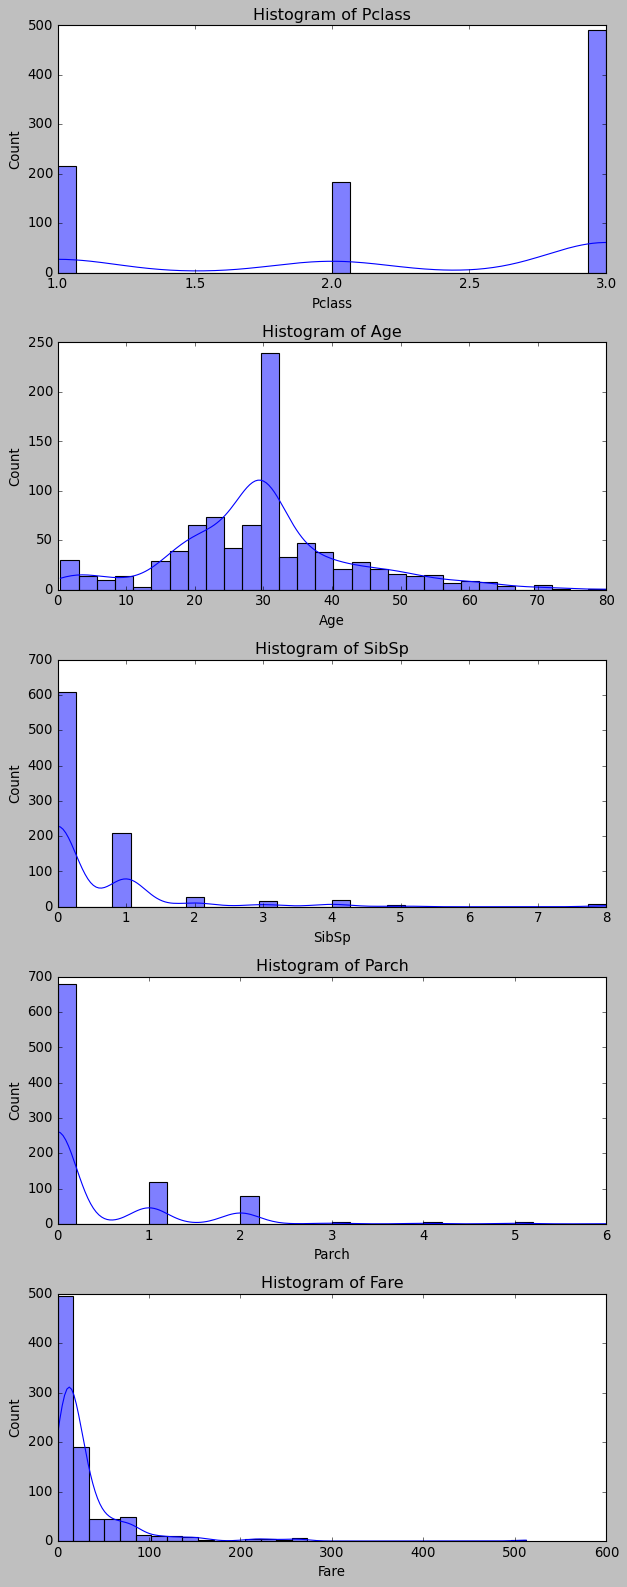

In [16]:
# Select your features
num_features = ["Pclass", "Age", "SibSp", "Parch", "Fare"]

# Set up the grid
fig, axes = plt.subplots(len(num_features), 1, figsize=(8, 20))

# Loop through each feature
for i, col in enumerate(num_features):
    sns.histplot(data=df, x=col, bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Histogram of {col}")

plt.tight_layout()
plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Survived              891 non-null    int64  
 1   Pclass                891 non-null    int64  
 2   Age                   891 non-null    float64
 3   SibSp                 891 non-null    int64  
 4   Parch                 891 non-null    int64  
 5   Fare                  891 non-null    float64
 6   Embarked_Q            891 non-null    bool   
 7   Embarked_S            891 non-null    bool   
 8   Embarked_Southampton  891 non-null    bool   
 9   Sex_male              891 non-null    bool   
dtypes: bool(4), float64(2), int64(4)
memory usage: 45.4 KB


In [14]:
num_features = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
print(num_features)

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [9]:
df = df.drop(['Ticket', 'PassengerId', 'Cabin', 'Name'], axis=1)


In [13]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

In [24]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Survived'], axis=1)
y = df['Survived']

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [26]:
# Check mean and std of scaled training data
print("Means:", X_train_scaled.mean(axis=0))
print("Stds:", X_train_scaled.std(axis=0))

Means: [-1.82126474e-16  3.89201779e-16 -5.61348720e-18 -1.62167408e-17
 -1.74641824e-17 -5.23925472e-17 -1.24744160e-18  0.00000000e+00
 -9.97953281e-18]
Stds: [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1, random_state=42)
ridge.fit(X_train_scaled, y_train)

# To check performance on validation data:
score = ridge.score(X_valid_scaled, y_valid)
print("Validation R^2 score:", score: .2f)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (116148091.py, line 8)